<h2> Importing Libaries and Loading the data </h2>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv("FraudDetectionDataset.csv")

In [4]:
data.head()

,Transaction ID,User ID,Transaction Amount,Transaction Date and Time,Merchant ID,Payment Method,Country Code,Transaction Type,Device Type,IP Address,...,User's Transaction History,Merchant's Reputation Score,User's Device Location,Transaction Currency,Transaction Purpose,User's Credit Score,User's Email Domain,Merchant's Business Age,Transaction Authentication Method,Fraudulent Flag
0,51595306,9822,163.08,2023-01-02 07:47:54,4044,ACH Transfer,KOR,Charity,GPS Device,42.23.223.120,...,26,2.71,United Kingdom,NOK,Consultation Fee,343,cox.co.uk,3,Bluetooth Authentication,0
1,85052974,4698,430.74,2021-09-12 15:15:41,4576,2Checkout,VNM,Cashback,Medical Device,39.52.212.120,...,60,3.95,Mexico,EGP,Cashback Reward,688,gmail.com,13,NFC Tag,1
2,23954324,8666,415.74,2023-01-12 17:25:58,4629,Google Wallet,MEX,Reward,Vehicle Infotainment System,243.180.236.29,...,81,3.81,Qatar,MXN,Acquisition,371,rocketmail.com,7,Token,1
3,44108303,9012,565.89,2021-02-27 11:31:00,3322,Check,SGP,Purchase,Kiosk,212.186.227.14,...,18,2.67,Spain,CLP,Loan Repayment,687,roadrunner.co.uk,15,Time-Based OTP,1
4,66622683,5185,955.49,2022-09-24 04:06:38,7609,Worldpay,HKG,Acquisition,Smart Mirror,166.113.10.199,...,98,3.19,Israel,RUB,Dividend Reinvestment,605,protonmail.co.uk,17,Password,1


<h2> Data Exploration </h2>

+ The data was checked for missing values and it was found that no column had missing values
+ The data also had no duplicates
+ Columns that would not add value to the analysis/modelling were removed
+ The datatype of each column was explored and grouped as categorical or numerical
+ The User's age was grouped into age categories instead
+ For categorical variables with a lot of categories, they were intelligently grouped into a maximum of 10 categories.

In [5]:
data.isnull().sum() #The data has no missing values
data.duplicated().sum() #Duplicate Entries
data = data.drop(['Transaction ID', 'User ID', 'Merchant ID', 'IP Address'],1)

C:\Users\PC\AppData\Local\Temp\ipykernel_17924\4293999416.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  data = data.drop(['Transaction ID', 'User ID', 'Merchant ID', 'IP Address'],1)


In [6]:
data['Transaction Date and Time'] = pd.to_datetime(data['Transaction Date and Time'])
data['Day of Transaction'] = data['Transaction Date and Time'].dt.strftime('%A')
data = data.drop(['Transaction Date and Time'],1)

C:\Users\PC\AppData\Local\Temp\ipykernel_17924\373453372.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  data = data.drop(['Transaction Date and Time'],1)


In [7]:
data['Day of Transaction'].value_counts()

Friday       862169
Sunday       860323
Saturday     859971
Monday       855401
Tuesday      854839
Wednesday    854067
Thursday     853230
Name: Day of Transaction, dtype: int64

In [8]:
def categorize_payment_method(payment_method):
    '''
    This function is adopted to categorize the payment methods into 6 categories instead of 40 for simplicity purposes

    Input: The Payment Method Column
    Output : The Payment Category Column (with 6 distinct categories)
    '''
    credit_debit_cards = ['Debit Card', 'Visa Checkout', 'Diners Club', 'American Express', 'Discover']
    mobile_wallets = ['Apple Pay', 'Google Wallet', 'Square Cash', 'Venmo']
    bank_transfers = ['Bank Transfer', 'Wire Transfer', 'Direct Debit', 'ACH Transfer']
    cryptocurrencies = ['Cryptocurrency Wallet', 'Ethereum', 'Bitcoin']
    checks = ['E-check', 'Check', 'Money Order']

    if payment_method in credit_debit_cards:
        return 'Credit/Debit Cards'
    elif payment_method in mobile_wallets:
        return 'Mobile Wallets'
    elif payment_method in bank_transfers:
        return 'Bank Transfers'
    elif payment_method in cryptocurrencies:
        return 'Digital Currencies (Cryptocurrency)'
    elif payment_method in checks:
        return 'Checks and E-Checks'
    else:
        return 'Other Payment Methods'

# Apply the categorize_payment_method function to create a new column
data['Payment Category'] = data['Payment Method'].apply(categorize_payment_method)
data = data.drop(['Payment Method'],1)

C:\Users\PC\AppData\Local\Temp\ipykernel_17924\801255783.py:29: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  data = data.drop(['Payment Method'],1)


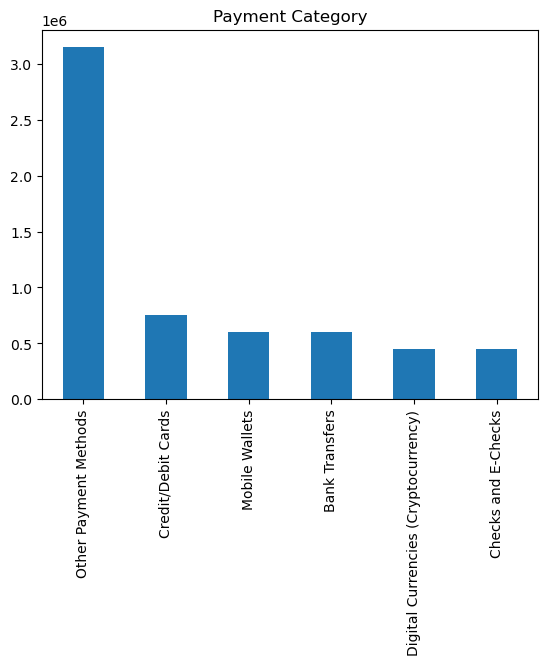

In [9]:
data['Payment Category'].value_counts().plot.bar()
plt.title("Payment Category");

In [10]:
def categorize_transaction_type(transaction_type):
    '''
    This function is adopted to categorize the transaction types into 5 categories instead of 38 for simplicity purposes

    Input: The Transaction Type Column
    Output : The Transaction Category Column (with 6 distinct categories)
    '''
    Refund = ["Refund"]
    Donation = ["Donation", "Charity", "Contribution"]
    Purchase = ['Purchase', "Buyback", "Acquisition", "Investment", "Auction"]
    Expense = ["Service Charge", "Expense", "Fine", "Tax", "Subscription", "Registration Fee", "Gift", "Reimbursement", "Payout", "Rent", "Royalty"]
    Income = ["Deposit", "Dividend", "Bonus", "Interest", "Membership", "Transfer", "Payment", "Cashback", "Settlement", "Compensation", "Recharge", "Admission", "Invoice", "Reward", "Rental", "Loan"]
    if transaction_type in Refund:
        return 'Refunds'
    elif transaction_type in Donation:
        return 'Donations'
    elif transaction_type in Purchase:
        return 'Purchases'
    elif transaction_type in Expense:
        return 'Expenses'
    elif transaction_type in Income:
        return 'Income'
    else:
        return 'Others'

# Apply the categorize_payment_method function to create a new column
data['Transaction Category'] = data['Transaction Type'].apply(categorize_transaction_type)
data = data.drop(['Transaction Type'],1)

C:\Users\PC\AppData\Local\Temp\ipykernel_17924\2843625455.py:28: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  data = data.drop(['Transaction Type'],1)


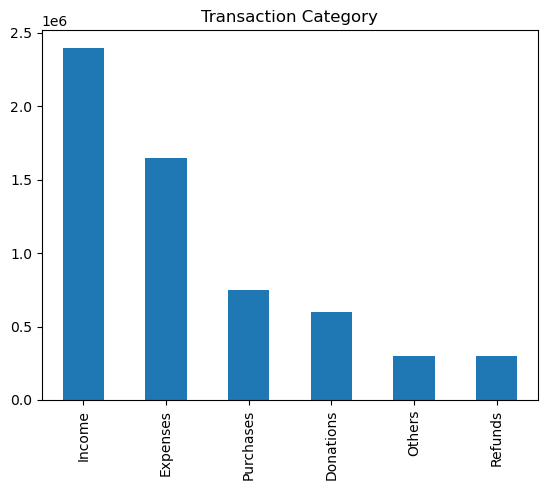

In [11]:
data['Transaction Category'].value_counts().plot.bar()
plt.title("Transaction Category");

In [12]:
#dropping currency since country is present
data = data.drop(['Transaction Currency'],1)
data = data.drop(['Location Distance'],1)

C:\Users\PC\AppData\Local\Temp\ipykernel_17924\2960878954.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  data = data.drop(['Transaction Currency'],1)
C:\Users\PC\AppData\Local\Temp\ipykernel_17924\2960878954.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  data = data.drop(['Location Distance'],1)


In [13]:
print (data["User Age"].value_counts())

bins = [0, 19, 29, 39, 49, 59, float('inf')]  # Age category bins
labels = ['0-19', '20-29', '30-39', '40-49', '50-59', '60+']  # Age category labels

# Use pd.cut to categorize ages
data['User Age'] = pd.cut(data['User Age'], bins=bins, labels=labels, right=False)

print (data["User Age"].value_counts())

28    95908
31    95852
60    95844
30    95828
73    95757
      ...  
77    94797
42    94675
19    94629
38    94494
26    94459
Name: User Age, Length: 63, dtype: int64
60+      2095840
30-39     953961
50-59     951895
40-49     951562
20-29     951399
0-19       95343
Name: User Age, dtype: int64


In [14]:
continent_mapping = {
    'HKG': 'Asia',
    'UK': 'Europe',
    'IDN': 'Asia',
    'VNM': 'Asia',
    'BEL': 'Europe',
    'GER': 'Europe',
    'ARG': 'South America',
    'SAU': 'Asia',
    'AUT': 'Europe',
    'CHN': 'Asia',
    'MAL': 'Asia',
    'RUS': 'Europe',
    'NGA': 'Africa',
    'FRA': 'Europe',
    'POL': 'Europe',
    'SGP': 'Asia',
    'MEX': 'North America',
    'TAI': 'Asia',
    'ISR': 'Asia',
    'JPN': 'Asia',
    'BRA': 'South America',
    'AUS': 'Oceania',
    'USA': 'North America',
    'THA': 'Asia',
    'IND': 'Asia',
    'QAT': 'Asia',
    'NLD': 'Europe',
    'KOR': 'Asia',
    'UAE': 'Asia',
    'CHE': 'Europe',
    'SWE': 'Europe',
    'NZL': 'Oceania',
    'CAN': 'North America',
    'EGY': 'Africa',
    'NOR': 'Europe',
    'ZAF': 'Africa',
    'ITA': 'Europe',
    'TUR': 'Asia',
    'ESP': 'Europe',
    'GRE': 'Europe'
}

# Map the country codes to continents and create a new column
data['Continent'] = data['Country Code'].map(continent_mapping)

data = data.drop(['Country Code'],1)

C:\Users\PC\AppData\Local\Temp\ipykernel_17924\527890832.py:47: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  data = data.drop(['Country Code'],1)


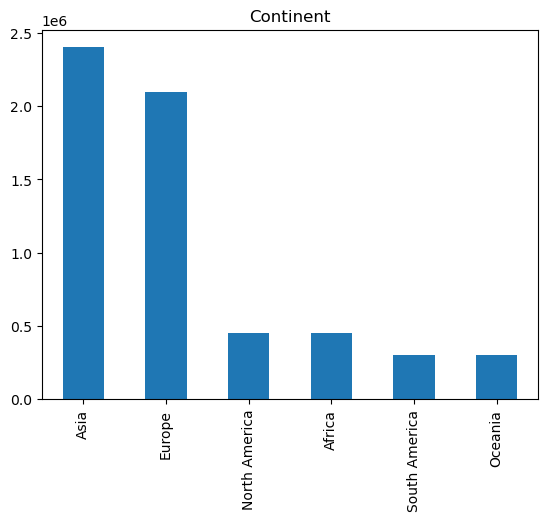

In [15]:
data['Continent'].value_counts().plot.bar()
plt.title("Continent");

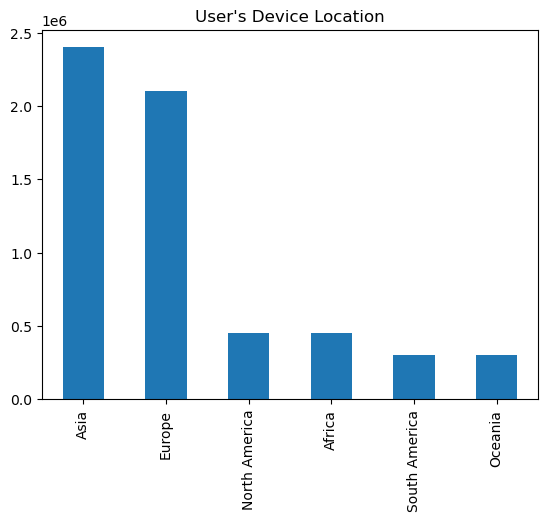

In [16]:
continent_mapping = {
    'United States': 'North America',
    'Italy': 'Europe',
    'Germany': 'Europe',
    'Malaysia': 'Asia',
    'Switzerland': 'Europe',
    'South Korea': 'Asia',
    'South Africa': 'Africa',
    'Nigeria': 'Africa',
    'Norway': 'Europe',
    'Spain': 'Europe',
    'Netherlands': 'Europe',
    'Turkey': 'Asia',
    'Greece': 'Europe',
    'Canada': 'North America',
    'Poland': 'Europe',
    'China': 'Asia',
    'Indonesia': 'Asia',
    'Sweden': 'Europe',
    'Hong Kong': 'Asia',
    'Singapore': 'Asia',
    'Thailand': 'Asia',
    'Qatar': 'Asia',
    'Mexico': 'North America',
    'Taiwan': 'Asia',
    'United Arab Emirates': 'Asia',
    'New Zealand': 'Oceania',
    'India': 'Asia',
    'Brazil': 'South America',
    'Vietnam': 'Asia',
    'Saudi Arabia': 'Asia',
    'Argentina': 'South America',
    'Russia': 'Europe',
    'Austria': 'Europe',
    'Japan': 'Asia',
    'Australia': 'Oceania',
    'Belgium': 'Europe',
    'United Kingdom': 'Europe',
    'Israel': 'Asia',
    'France': 'Europe',
    'Egypt': 'Africa'
}

data["User's Device Location"] = data["User\'s Device Location"].map(continent_mapping)
data["User\'s Device Location"].value_counts().plot.bar()
plt.title("User's Device Location");

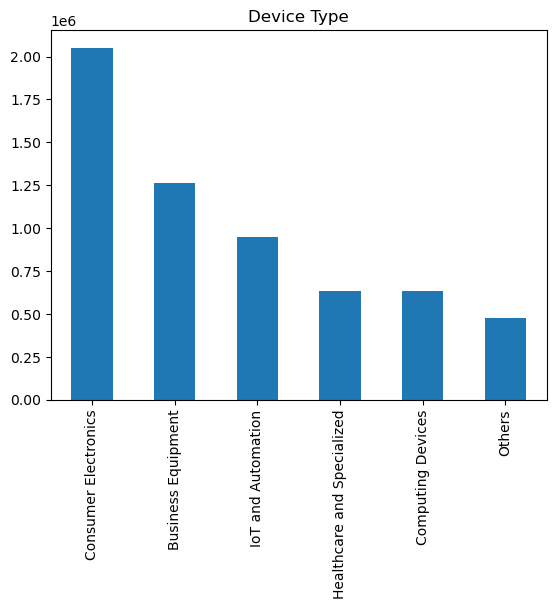

In [17]:
def categorize_device(device):
    if device in ['Smart TV', 'Smart Speaker', 'Smart Appliance', 'Wearable Device', 'Smartwatch', 'Gaming Console', 'Smart Doorbell', 'E-Reader', 'Smart Mirror', 'Virtual Reality Headset', 'Smartphone', 'Digital Camera', 'Smart Thermostat']:
        return 'Consumer Electronics'
    elif device in ['Cash Register', 'Kiosk', 'POS Terminal', 'Barcode Scanner', 'Self-Checkout Kiosk', 'Industrial Controller', 'Vehicle Infotainment System', 'Vending Machine']:
        return 'Business Equipment'
    elif device in ['Laptop', 'Tablet', 'Desktop', 'Server']:
        return 'Computing Devices'
    elif device in ['IoT Device', 'Home Automation Hub', 'Embedded System', 'Home Security System', 'Smart Lock', 'Robot']:
        return 'IoT and Automation'
    elif device in ['Fitness Tracker', 'GPS Device', 'Medical Device', 'Augmented Reality Glasses', 'Vehicle Infotainment System']:
        return 'Healthcare and Specialized'
    else:
        return 'Others'

# Apply the categorization function to create the new column
data['Device Type'] = data['Device Type'].apply(categorize_device)

data['Device Type'].value_counts().plot.bar()
plt.title("Device Type");

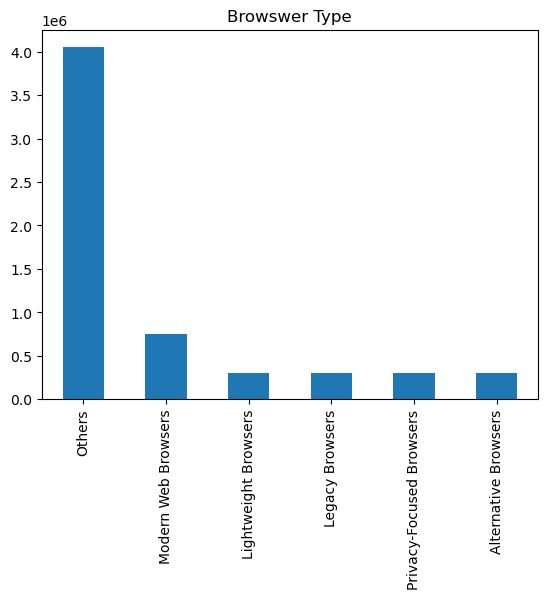

In [18]:
def categorize_browser(browser):
    if browser in ['Chrome', 'Firefox', 'Safari', 'Edge', 'Opera']:
        return 'Modern Web Browsers'
    elif browser in ['Brave', 'Tor Browser']:
        return 'Privacy-Focused Browsers'
    elif browser in ['Internet Explorer', 'SeaMonkey']:
        return 'Legacy Browsers'
    elif browser in ['Vivaldi', 'Maxthon']:
        return 'Alternative Browsers'
    elif browser in ['Lynx', 'Links']:
        return 'Lightweight Browsers'
    else:
        return 'Others'

# Apply the categorization function to create the new column
data['Browswer Type'] = data['Browser Type'].apply(categorize_browser)
data['Browswer Type'].value_counts().plot.bar()
plt.title("Browswer Type");


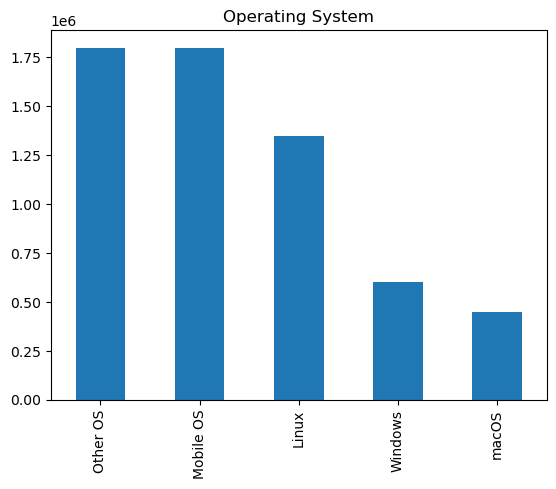

In [19]:
def categorize_os(os):
    if os in ['Windows', 'Windows Server', 'Windows Mobile', 'Windows CE']:
        return 'Windows'
    elif os in ['Mac OS X', 'macOS', 'macOS Server']:
        return 'macOS'
    elif os in ['Debian', 'openSUSE', 'CentOS', 'Red Hat Enterprise Linux', 'Ubuntu', 'Gentoo', 'Arch Linux', 'Fedora', 'Linux']:
        return 'Linux'
    elif os in ['Android', 'Sailfish OS', 'Android Wear', 'iOS', 'Tizen', 'KaiOS', 'HarmonyOS', 'BlackBerry', 'Symbian', 'Android TV', 'MeeGo', 'tvOS']:
        return 'Mobile OS'
    else:
        return 'Other OS'

data['Operating System'] = data['Operating System'].apply(categorize_os)

data['Operating System'].value_counts().plot.bar()
plt.title("Operating System");

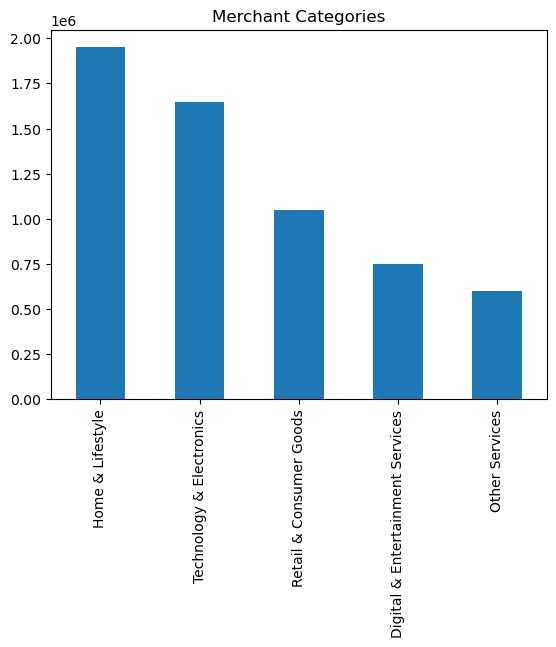

In [20]:
def merchant(item):
    if item in ['Electronics', 'Jewelry', 'Gifts & Souvenirs', 'Toys & Games', 'Luxury Brands', 'Clothing', 'Vintage & Antique']:
        return 'Retail & Consumer Goods'
    elif item in ['Subscription Services', 'Entertainment', 'Books & Literature', 'Music & Instruments', 'Online Marketplace']:
        return 'Digital & Entertainment Services'
    elif item in ['Home Improvement', 'Real Estate', 'Pets & Animals', 'Farm & Agriculture', 'Wedding & Bridal', 'Home & Garden', 'Furniture', 'Appliances', 'Hobby & Crafts', 'Art & Collectibles', 'Beauty & Cosmetics', 'Baby & Maternity', 'Sporting Goods']:
        return 'Home & Lifestyle'
    elif item in ['Electronics Repair', 'Technology', 'Office Supplies', 'Automotive', 'Health & Wellness', 'Fitness & Nutrition', 'Travel & Tourism', 'Food & Beverage', 'Financial Services', 'Specialty Services', 'Industrial & Scientific']:
        return 'Technology & Electronics'
    else:
        return 'Other Services'

# Apply the categorization function to create the new column
data['Merchant Category'] = data['Merchant Category'].apply(merchant)

data['Merchant Category'].value_counts().plot.bar()
plt.title("Merchant Categories");

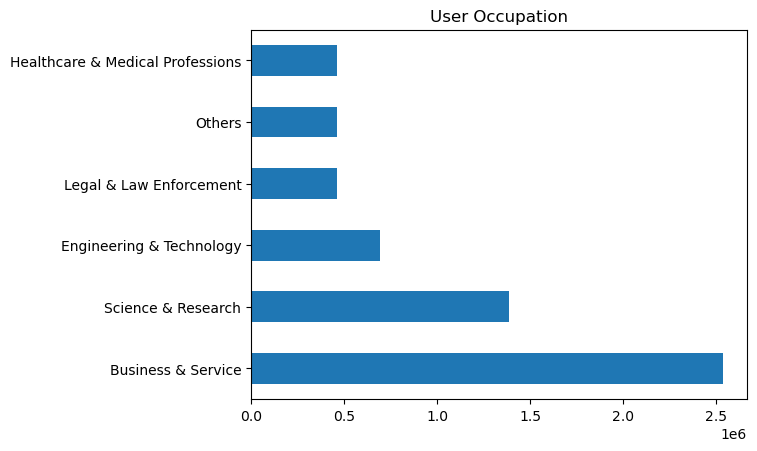

In [21]:
def categorize_occupation(occupation):
    if occupation in ['Nurse', 'Doctor']:
        return 'Healthcare & Medical Professions'
    elif occupation in ['Engineer', 'Software Developer', 'Architect']:
        return 'Engineering & Technology'
    elif occupation in ['Lawyer', 'Police Officer']:
        return 'Legal & Law Enforcement'
    elif occupation in ['Biologist', 'Mathematician', 'Geologist', 'Chemist', 'Physicist', 'Researcher']:
        return 'Science & Research'
    elif occupation in ['Salesperson', 'Accountant', 'Firefighter', 'Electrician', 'Event Planner', 'Fashion Designer', 'Chef', 'Counselor', 'Surveyor', 'Artist', 'Teacher']:
        return 'Business & Service'
    else:
        return 'Others'

# Apply the categorization function to create the new column
data['User Occupation'] = data['User Occupation'].apply(categorize_occupation)

data['User Occupation'].value_counts().plot.barh()
plt.title("User Occupation");

In [22]:
def categorize_transaction_status(status):
    if status in ['In Progress', 'Sent', 'Transferred', 'Pending Confirmation', 'Processing', 'Pending Payment', 'Authorized']:
        return 'Processing & Confirmation'
    elif status in ['Approved', 'Posted', 'Closed', 'Cleared', 'Settled', 'Processed', 'Delivered', 'Executed', 'Completed', 'Credited', 'Resolved', 'Verified']:
        return 'Completed & Approved'
    elif status in ['Void', 'Debit', 'Declined', 'Rejected', 'Partially Declined', 'Declined']:
        return 'Declined & Rejected'
    elif status in ['Hold', 'Under Review', 'Held for Security']:
        return 'Held & Under Review'
    elif status in ['Unverified', 'Error']:
        return 'Unverified & Error'
    else:
        return 'Others'

# Apply the categorization function to create the new column
data['Transaction Status'] = data['Transaction Status'].apply(categorize_transaction_status)


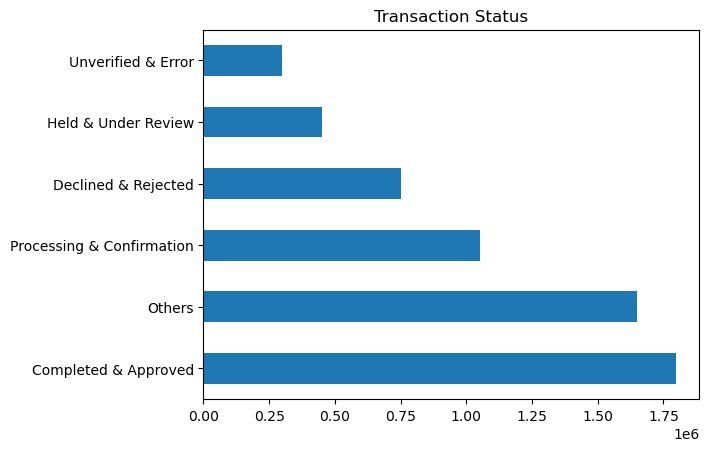

In [23]:
data['Transaction Status'].value_counts().plot.barh()
plt.title("Transaction Status");

In [24]:
# Create a function to categorize the transaction purposes
def categorize_transaction_purpose(purpose):
    if purpose in ['Invoice Payment', 'Dividend Reinvestment', 'Compensation', 'Buyback', 'Interest Payment', 'Expense Reimbursement', 'Investment', 'Payout', 'Cashback Reward', 'Loan Repayment', 'Auction Bid', 'Bonus']:
        return 'Financial Transactions'
    elif purpose in ['Service Charge', 'Product Purchase', 'Recharge', 'Bill Payment', 'Registration Fee', 'Retail Purchase', 'Gift Purchase', 'Settlement', 'Utility Payment', 'Tax Payment']:
        return 'Payment & Purchase'
    elif purpose in ['Donation to Nonprofit', 'Charity Donation', 'Scholarship']:
        return 'Charitable & Nonprofit'
    elif purpose in ['Consultation Fee', 'Royalty']:
        return 'Business & Professional Services'
    elif purpose in ['Subscription Renewal', 'Membership']:
        return 'Subscription & Membership'
    else:
        return 'Others'

# Apply the categorization function to create the new column
data['Transaction Purpose'] = data['Transaction Purpose'].apply(categorize_transaction_purpose)

Text(0.5, 1.0, 'Transaction Purpose')

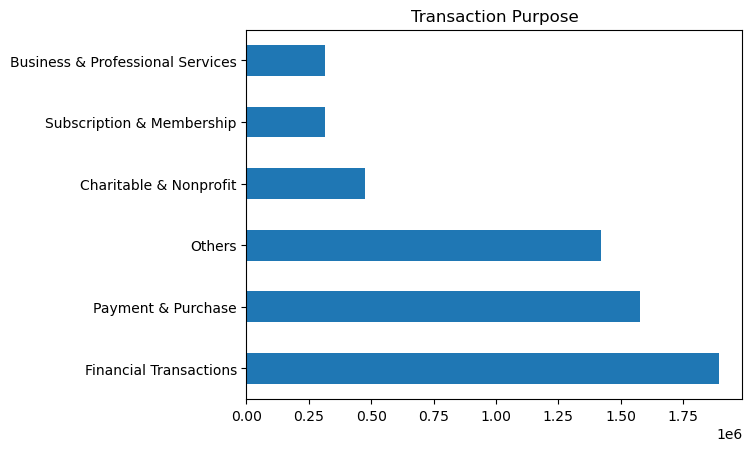

In [25]:
data['Transaction Purpose'].value_counts().plot.barh()
plt.title("Transaction Purpose")

In [26]:
def categorize_authentication_method(auth_method):
    if auth_method in ['Behavioral Biometrics', 'Voiceprint', 'Palm Vein Scan', 'Iris Scan', 'Biometric Scan', 'Retina Scan', 'Fingerprint', 'Face ID']:
        return 'Biometric Authentication'
    elif auth_method in ['Hardware Token', 'Smart Card', 'Biometric Card', 'Token', 'Certificate-based Authentication', 'USB Security Key']:
        return 'Token-Based Authentication'
    elif auth_method in ['Two-Factor Authentication', 'Time-Based OTP', 'Authentication App', 'Mobile App Notification']:
        return 'Multi-Factor Authentication (MFA)'
    elif auth_method in ['Knowledge-Based Authentication', 'Security Question', 'Pattern Lock', 'CAPTCHA']:
        return 'Knowledge-Based Authentication'
    elif auth_method in ['SMS Code', 'Social Media Login', 'Mobile Phone Verification', 'Push Notification Confirmation', 'Bluetooth Authentication']:
        return 'Mobile Authentication'
    elif auth_method in ['Email Verification', 'Voice Recognition']:
        return 'Email & Voice Authentication'
    elif auth_method in ['Geolocation Verification', 'NFC Tag', 'Radio-Frequency Identification (RFID)']:
        return 'Geolocation & NFC Authentication'
    elif auth_method in ['Signature Verification']:
        return 'Signature Verification'
    elif auth_method in ['Transaction Confirmation Number', 'QR Code']:
        return 'Transaction-Specific Authentication'
    elif auth_method in ['PIN', 'Password']:
        return 'Traditional Password & PIN'
    else:
        return 'Others'

data['Transaction Authentication Method'] = data['Transaction Authentication Method'].apply(categorize_authentication_method)

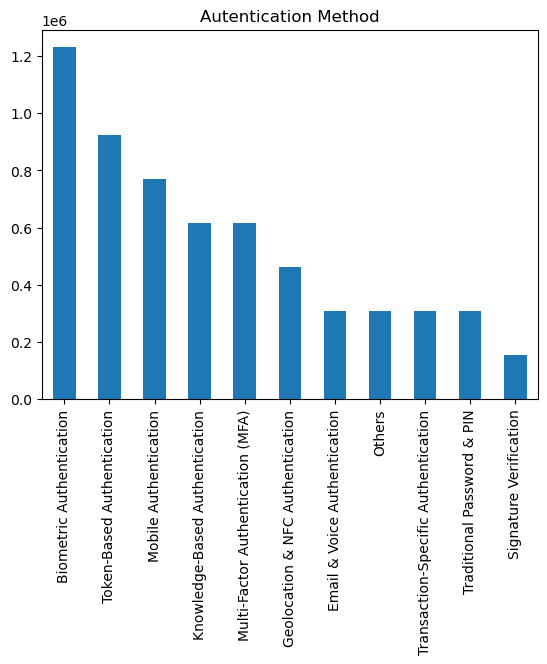

In [27]:
data['Transaction Authentication Method'].value_counts().plot.bar()
plt.title("Autentication Method");

In [28]:
def classify_domain(domain):
    maybe_scam_domains = ['roadrunner.co.uk', 'yandex.co.uk', 'zoho.co.uk', 'tutanota.co.uk', 'rediffmail.co.uk', 'protonmail.co.uk', 'verizon.co.uk', 'cox.co.uk', 'fastmail.co.uk', 'rocketmail.co.uk', 'icloud.co.uk', 'yahoo.co.uk', 'live.co.uk', 'gmail.co.uk']
    not_scam_domains = ['gmail.co.in', 'outlook.com', 'yandex.com', 'cox.net', 'aol.com', 'protonmail.com', 'verizon.net', 'icloud.com', 'rocketmail.com', 'gmx.com', 'zoho.com', 'gmail.ca', 'yahoo.ca', 'fastmail.com', 'outlook.co.uk', 'gmail.com', 'hotmail.com', 'mail.com', 'yahoo.com', 'rediffmail.com', 'live.com']
    if domain in maybe_scam_domains:
        return 'Maybe Scam'
    elif domain in not_scam_domains:
        return 'Less Likely Scam'
    else:
        return 'Very Likely Scam'

# Apply the classification function to create a new column
data["User's Email Domain"] = data["User's Email Domain"].apply(classify_domain)

In [29]:
numerical_cols = []
categorical_cols = []

for i in data.columns:
    if (data[i].dtype == 'object') | (data[i].dtype == 'category'):
        categorical_cols.append(i)

for i in data.columns:
    if (data[i].dtype == 'float64') | (data[i].dtype == 'int64'):
        numerical_cols.append(i)

In [30]:
categorical_cols

['Device Type',
 'Browser Type',
 'Operating System',
 'Merchant Category',
 'User Age',
 'User Occupation',
 'User Gender',
 'User Account Status',
 'Transaction Status',
 'Transaction Time of Day',
 "User's Device Location",
 'Transaction Purpose',
 "User's Email Domain",
 'Transaction Authentication Method',
 'Day of Transaction',
 'Payment Category',
 'Transaction Category',
 'Continent',
 'Browswer Type']

<h2> Data Preprocessing and Feature Engineering</h2>

In [31]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [32]:
label_encoder = LabelEncoder()
for i in categorical_cols:
    data[i] = label_encoder.fit_transform(data[i])

In [33]:
from scipy import stats
import numpy as np

transformed_data, lambda_value = stats.boxcox(data['Transaction Amount'])
data['Transaction Amount_boxcox'] = transformed_data
data['Transaction Amount_boxcox'].head()

0     51.123283
1    103.336710
2    100.731687
3    125.749724
4    183.087626
Name: Transaction Amount_boxcox, dtype: float64

In [34]:
X = data.drop(['Fraudulent Flag'],1)
y = data['Fraudulent Flag']

C:\Users\PC\AppData\Local\Temp\ipykernel_17924\2537373179.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = data.drop(['Fraudulent Flag'],1)


In [35]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, stratify= y, random_state = 42)

In [36]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.fit_transform(X_test)

# Modelling and Evaluation

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

# Load your preprocessed data (replace 'X' and 'y' with your actual variables)
# X, y = ...

# Define a list of classifiers to evaluate
classifiers = [
    ('Random Forest', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('Gradient Boosting', GradientBoostingClassifier(n_estimators=100, random_state=42)),
    ('SVM', SVC(kernel='linear', probability=True, random_state=42)),
    ('Logistic Regression', LogisticRegression(random_state=42)),
    ('KNN', KNeighborsClassifier(n_neighbors=5))
]

# Perform cross-validation and evaluate each classifier
results = []
for name, classifier in classifiers:
    accuracy_scores = cross_val_score(classifier, X, y, cv=5, scoring='accuracy')
    f1_scores = cross_val_score(classifier, X, y, cv=5, scoring='f1_macro')
    roc_auc_scores = cross_val_score(classifier, X, y, cv=5, scoring='roc_auc')
    
    results.append({
        'Classifier': name,
        'Accuracy Mean': np.mean(accuracy_scores),
        'F1-Score Mean': np.mean(f1_scores),
        'ROC-AUC Mean': np.mean(roc_auc_scores)
    })

# Convert the results to a DataFrame for easy comparison
results_df = pd.DataFrame(results)

# Filter models with accuracy >= 0.9
best_models = results_df[results_df['Accuracy Mean'] >= 0.9]

# Print the results
print("Model Evaluation Results:")
print(results_df)

print("\nBest Models with Accuracy >= 0.9:")
print(best_models)